# Session 2. Web Structure Mining: Generalities, Complex Networks and Node-Centric Metrics
In this practical work, we will first check if a network satisfies the 3 constraints to be considered as a complex network and then, we will determine how important nodes are within this network.

The library we will use for handling networks is `networkx`.

## First, let's install the potentially missing libraries
(not necessary if you are certain these libs are installed on your system)

In [ ]:
pip install pandas
pip install networkx
pip install seaborn

## Second, let's import the useful packages
You can avoid the first line if you are not using a Jupyter notebook. This line enables the visualization to be displayed in the notebook.

In [2]:
%matplotlib inline

import networkx as nx
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

## Good, if you have not encounter any problems, we can start working now!
### First download the dataset (on Moodle)

In [3]:
# Obviously, you must replace the path below by the appropriate path
pathData = "airports.net"

### Then, navigate through the documentation of the networkx package and find how to load networks in the pajek format
Note that the graph should be directed.

TIP: to create a directed simple graph after loading the pajek network, you must use the follwing instruction `g = nx.DiGraph(g)` where g is the loaded pajek network.

In [4]:
g = nx.read_pajek(pathData)
g = nx.DiGraph(g)

## Check the complex network properties
### Long-tail distribution

#### Plot the degree distribution of the graph
1. Calculate and store the degree of each node
2. Convert the result (a dict) into a Pandas object, a Series
3. Use the seaborn `distplot` function to plot the degree distribution. Check the documenetation to set the parameters as follows: 20 bins and no gaussian kernel density estimate. Note that you must use the `plt.show()` instruction afterward to visualize the result.

In [5]:
degrees = [x[1] for x in g.degree]

In [6]:
series = pd.Series(degrees)

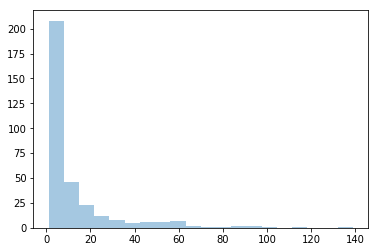

In [7]:
sns.distplot(series, bins=20, kde=False)
plt.show()

#### Check if the graph satisfies the power-law degree property
Modify the call to the distplot function to graphically check if the degree distibution fits a power-law distribution. To do so, you should set the fit parameter to stats.powerlaw. Conclude.

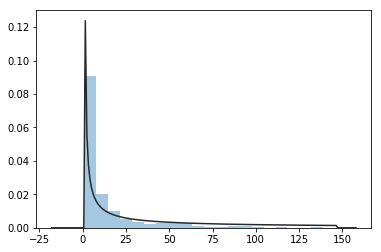

In [8]:
sns.distplot(series, bins=20, kde=False, fit=stats.powerlaw)
plt.show()

ça suit bien c'est cool, qu'est-ce que tu veux que je te dise de plus fils de pute.

### Small-world hypothesis
We now want to check if this network satisfies the small-world hypothesis. To do so, we are going to calculate the average shortest path between some nodes. In theory, all pairs should be considered. However, due to both resources and time constraint, it is acceptable to cinsider a sample of nodes only. You will apply the following methodology:

1. Convert the nodes into a Panda's series
2. Extract a sample from this series (size= 500)
3. For each pair from this subset, calculate the length of the shortest path and increment two variables accordingly (one to store the sum of the shortest path length and the other to store the number of calculated shortest paths)
4. Calculate and print the average

In [9]:
nodes = pd.Series(g.nodes)

In [10]:
nb_path = 0
sp_sum = 0
for i in range(len(nodes)):
    for j in range(len(nodes)):
        if i==j: continue
        try:
            sp_sum += nx.shortest_path_length(g, nodes[i], nodes[j])
            nb_path += 1
        except nx.NetworkXNoPath: continue

In [11]:
avg_path_len = sp_sum/nb_path
avg_path_len

2.5639775322510956

### Check the strong community structure
To check how string is the community structure in this network, we will apply the following methodology:

1. Use the `gnm_random_graph` function to generate a random graph having the same number of vertices and edges than the studied network
2. Calculate the average clustering on both networks
3. Conclude

In [12]:
random_graph = nx.gnm_random_graph(len(g.nodes), len(g.edges), directed=True)

In [13]:
print(nx.transitivity(random_graph))
print(nx.transitivity(g))

0.018753691671588895
0.2172385504351548


=> Structuration assez forte par communautés

## Node-Centric Metrics
We will now focus on the relative importance of vertices within the network. Luckily, many centrality metrics are implemented in networkx.

### Centrality Metrics
Have a look to the package documentation and calculate the following centralities:
1. degree
2. closeness
3. eigenvector
4. Katz
5. betweenness

In [14]:
centrality = {}
centrality['degree'] = list(nx.degree_centrality(g).values())

In [15]:
centrality['closeness'] = list(nx.closeness_centrality(g).values())

In [16]:
centrality['eigenvector'] = list(nx.eigenvector_centrality(g, max_iter=1000).values())

In [17]:
centrality['katz'] = list(nx.katz_centrality(g).values())

In [18]:
centrality['betweeness'] = list(nx.betweenness_centrality(g).values())

### Page Rank and HITS
Similarly to the previous question, have a look to the package documentation and calculate the following metrics:

1. Page Rank
2. Hub and Authorities (HITS)

In [19]:
centrality['pagerank'] = list(nx.pagerank(g).values())

In [20]:
centrality['hub'] = list(nx.hits(g)[0].values())

In [21]:
centrality['authority'] = list(nx.hits(g)[1].values())

### On the correlation of node-centric metrics
First, create a dataframe using with the above calculated centralities.

Then, we will plot the pairwise relationships between centralities to have a first glimpse of the possible correlation between them. For this, use the pairplot function of the seaborn package.

We will now assess more properly these potential correlations. For this, use the `corr()` on your data frame. Be aware that the default method mignt not be appropriate to your case. Once the pairwise correlations have been calculated, we will plot the related method using the `heatmap()` function of the seaborn package. TIP: to change the color scheme, you can use the cmap parameter with value `plt.get_cmap(xxx)` where xxx is a color scheme (visit this site to get the list of existing color schemes).

In [22]:
df = pd.DataFrame({'nodes': list(g.nodes)})
for k,v in centrality.items():
    df[k] = pd.Series(v, index=df.index)
df.head()

,nodes,degree,closeness,eigenvector,katz,betweeness,pagerank,hub,authority
0,Wiley Post-Will Rogers Mem,0.009063,0.000000,1.778962e-110,0.002943,0.000000,0.000912,4.284491e-08,0.000000e+00
1,Deadhorse,0.009063,0.003021,1.593950e-107,0.003237,0.000000,0.001064,3.614750e-08,5.993952e-10
2,Ralph Wien Memorial,0.006042,0.000000,1.778962e-110,0.002943,0.000000,0.000912,3.516038e-08,0.000000e+00
3,Fairbanks Intl,0.015106,0.006042,7.148865e-105,0.003561,0.000412,0.001516,9.256842e-05,1.651769e-09
4,Nome,0.006042,0.003021,1.593950e-107,0.003237,0.000000,0.001100,3.540765e-08,3.034823e-10


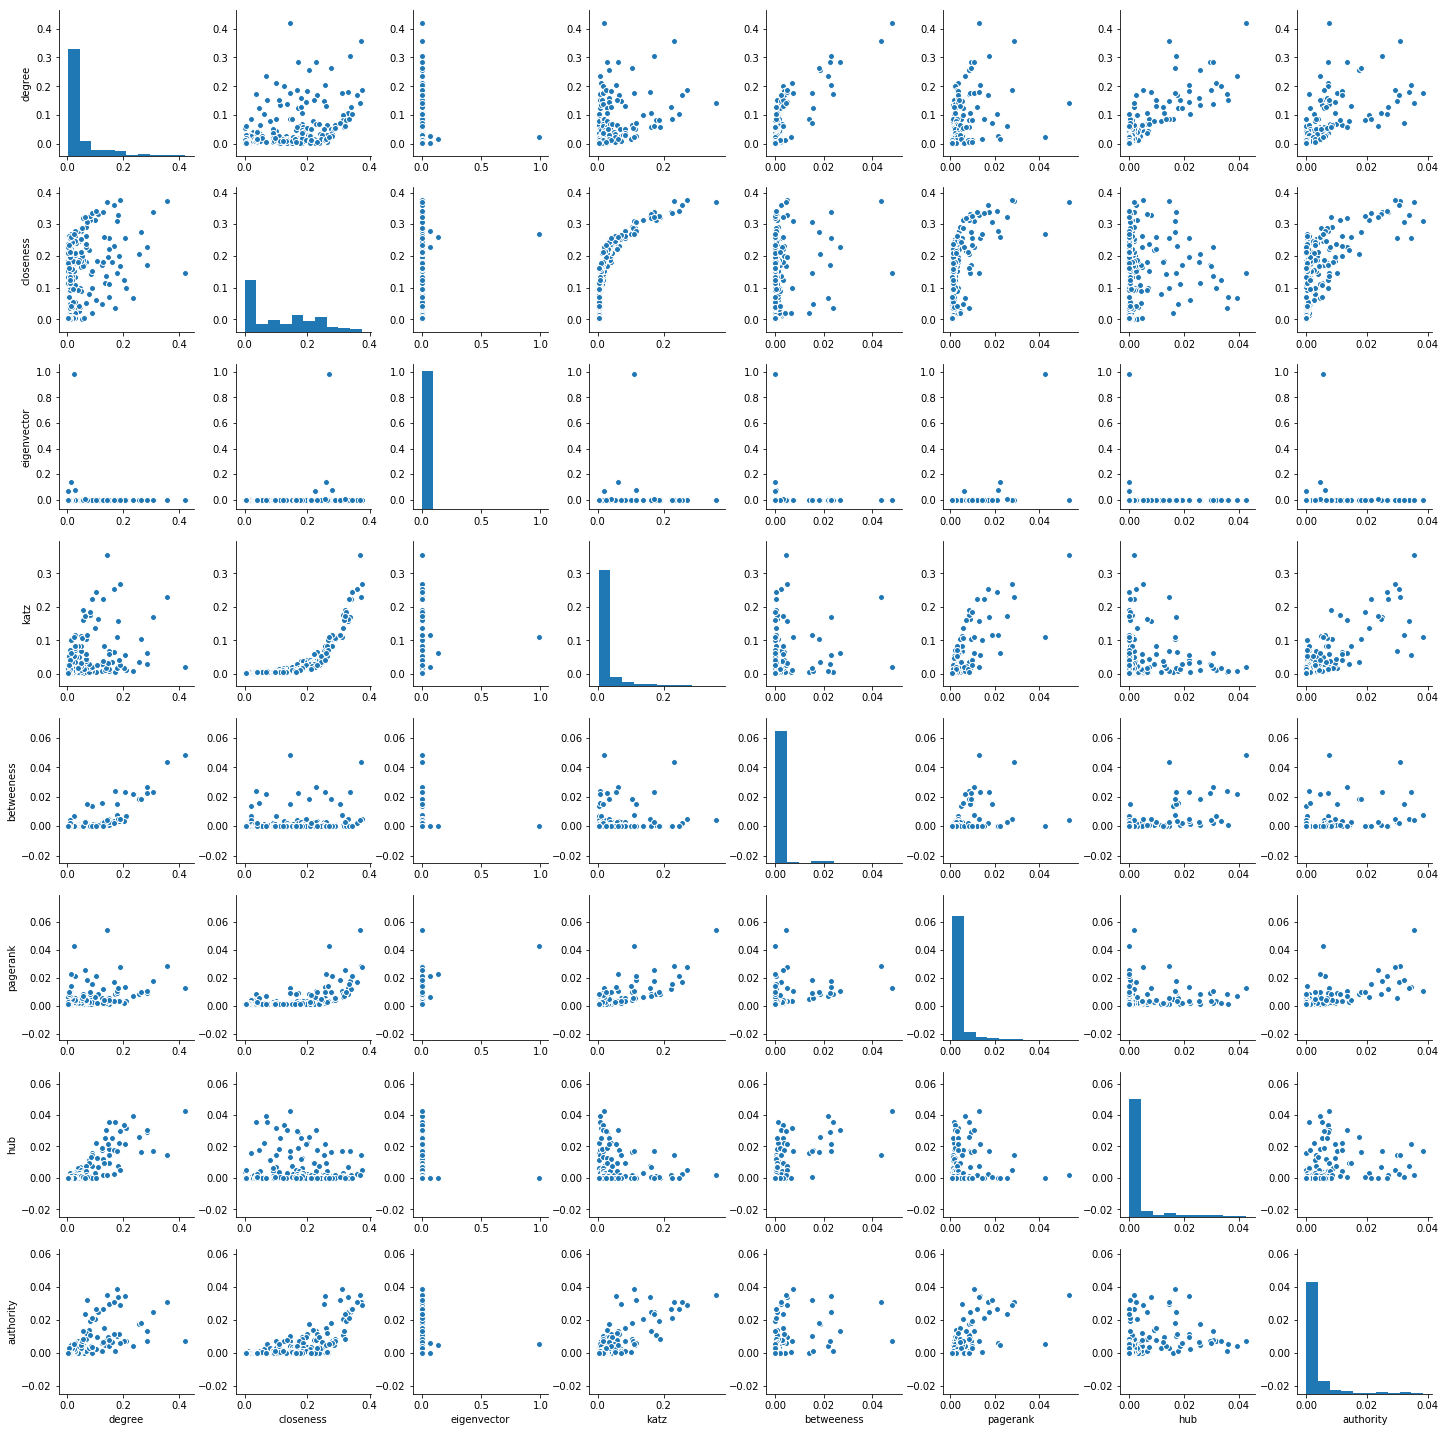

In [23]:
sns.pairplot(df)
plt.show()

In [24]:
df.corr()

,degree,closeness,eigenvector,katz,betweeness,pagerank,hub,authority
degree,1.000000,0.393604,-0.018880,0.468243,0.798510,0.474958,0.853305,0.688559
closeness,0.393604,1.000000,0.099005,0.731997,0.189804,0.516294,0.153477,0.607713
eigenvector,-0.018880,0.099005,1.000000,0.108157,-0.018794,0.441311,-0.029058,0.022513
katz,0.468243,0.731997,0.108157,1.000000,0.238506,0.786510,0.094582,0.813706
betweeness,0.798510,0.189804,-0.018794,0.238506,1.000000,0.412777,0.663226,0.438783
pagerank,0.474958,0.516294,0.441311,0.786510,0.412777,1.000000,0.190035,0.694657
hub,0.853305,0.153477,-0.029058,0.094582,0.663226,0.190035,1.000000,0.377829
authority,0.688559,0.607713,0.022513,0.813706,0.438783,0.694657,0.377829,1.000000


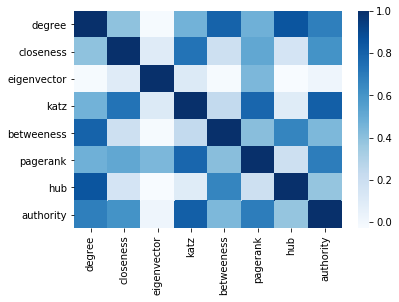

In [25]:
sns.heatmap(df.corr(), cmap=plt.get_cmap('Blues'))
plt.show()

### On the finding of atypical vertices
As discussed during the lecture ans as you have just seen in the previous question, centrality metrics are often positively correlated. We will now find some key vertices in the network. Typically, these vertices are vertices that somehow "break" the positive pairwise correlations. You mission is to find at least one of these vertices. To do so, you will apply the following methodology:

1. Extract the 10 top airports per centrality metric
2. Compare the list and conclude

In [26]:
top = {}
for k in centrality.keys():
    top[k] = [x[0] for x in df.sort_values(by=k, ascending=False)[:10].values]

In [27]:
top_df = pd.DataFrame(top)

In [28]:
top_nodes = []
for metric in top:
    for node in top[metric]:
        if node in top_nodes: continue
        top_nodes.append(node)

tab_df = pd.DataFrame({'airport': top_nodes})
for k,v in top.items():
    values = []
    for node in top_nodes:
        if node in v:
            values.append('X')
        else:
            values.append(' ')
    tab_df[k] = pd.Series(values, index=tab_df.index)
tab_df = tab_df.sort_values(by='airport')
tab_df

,airport,degree,closeness,eigenvector,katz,betweeness,pagerank,hub,authority
18,Alexander Hamilton,,,X,,,X,,
5,Charlotte/Douglas Intl,X,,,,X,,,
0,Chicago O'hare Intl,X,,,,X,,X,
20,Cyril E King,,,X,,,X,,
1,Dallas/Fort Worth Intl,X,X,,X,X,X,,X
8,Detroit Metropolitan Wayne Cou,X,,,,,,X,
21,Eugenio Maria De Hostos,,,X,,,,,
13,Fort Lauderdale/Hollywood Intl,,X,X,X,,X,,
29,General Edward Lawrence Logan,,,,,,,X,
28,Honolulu Intl,,,,,,X,,X


The table above shows for each airport whether it is in the top-10 for each metric. The key vertices are the airports that appear in very few of the top-10. For example, the "William P Hobby" airport is a key vertex because it only appears in the kats centrality top-10.

## Graph visualization 
We will finally visualize the network to find some key vertices in the network. This can be useful to explain why some vertices play a crucial role in the network.

TIP 1: one way to fix the spatial position of the vertices is to use the vertex attributes x and y. To do so, you should create a dictionnary such that the keys are the labels of the vertices and the values are tuples isuch as (x,y) TIP 2: you can pass a dictionnary as parameter of the `draw_network` function to specify some visualization parameter, e.g., `nx.draw_networkx(g, **options)` where options is defined as:

In [76]:
options = {
    'node_color' : centrality['pagerank'],# either a color or a list with values (the vertex color will thus change according to the value) -- the size of the list should be the same as the number of vertices in the network
    'node_size' : 50, 
    'cmap' : plt.get_cmap("jet"), # a color scheme (see below)
    #'vmin' : 0, # these two options are used to adjust the color scheme
    #'vmax' : 0.7 , # these two options are used to adjust the color scheme
    'node_shape' : 'o', # the shape of the node
    'with_labels' : False, # print labels or not,
    'width': 0.1
}

In [70]:
pos = {}
for n in g.nodes():
    pos[n] = (g.node[n]['x'],-g.node[n]['y'])

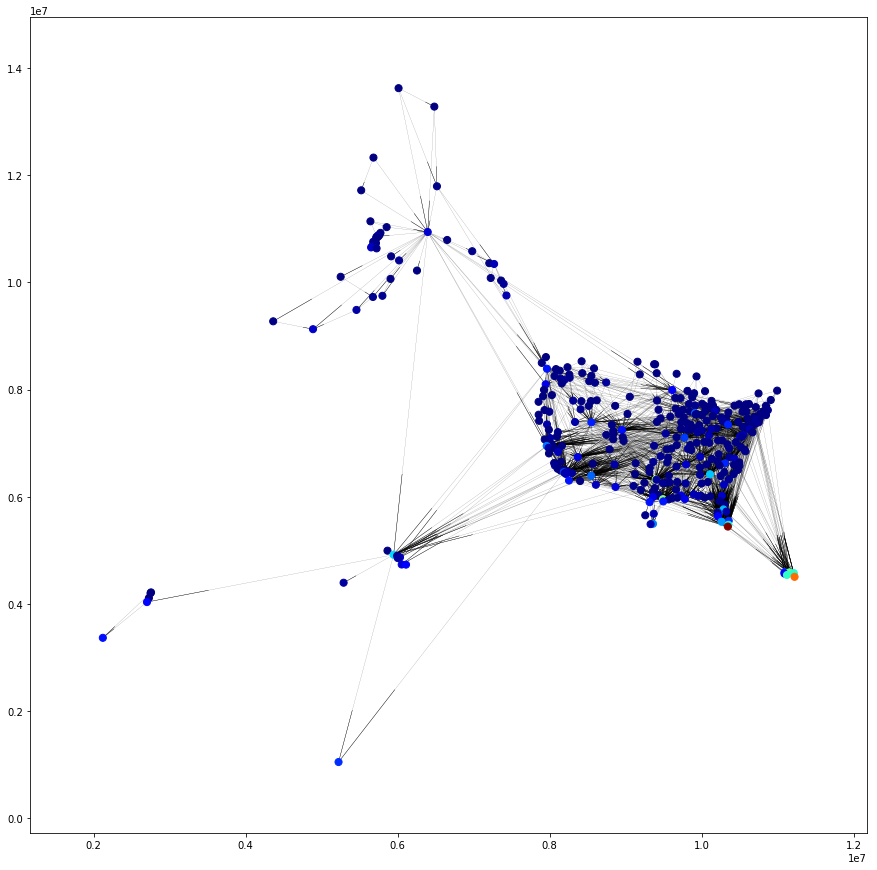

In [77]:
plt.figure(1,figsize=(15,15)) 
nx.draw_networkx(g, pos=pos, **options)
plt.show()

70.9
-160.91
-10.900000000000006
-79.09


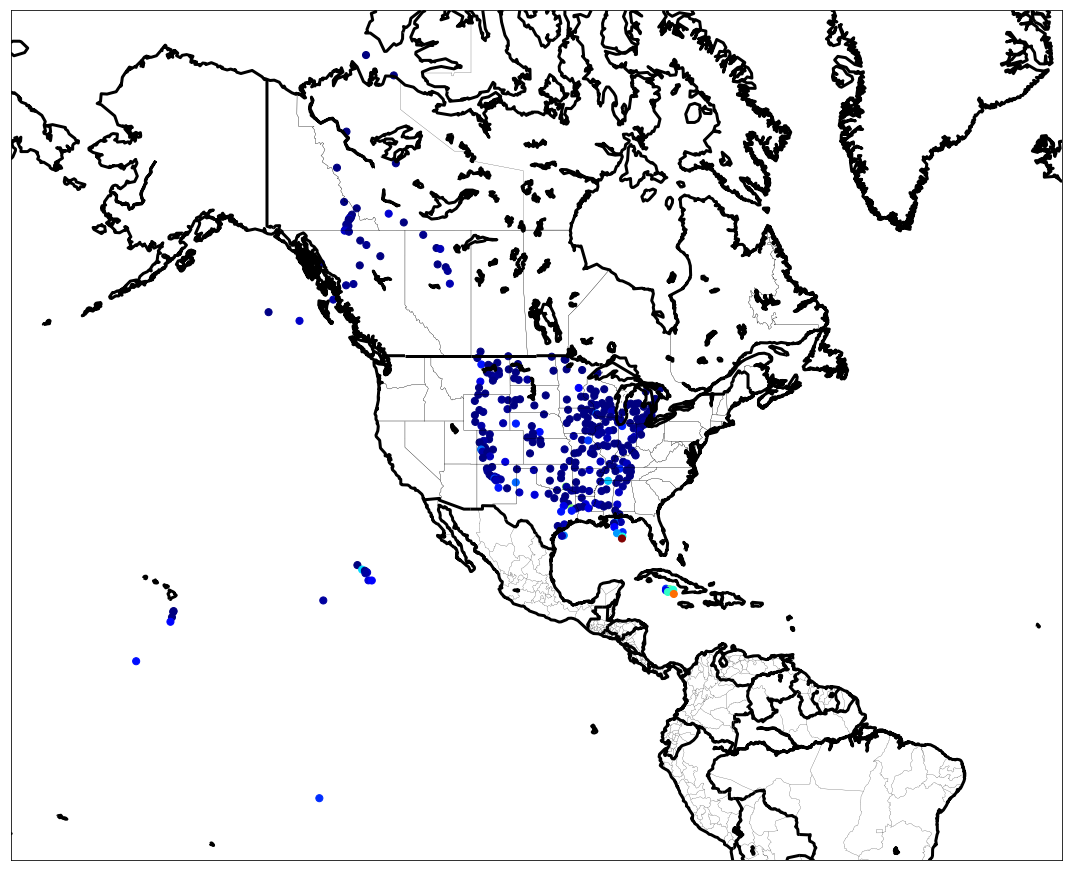

In [73]:
from mpl_toolkits.basemap import Basemap as Basemap

pos = {}
X = []
Y = []

for n in g.nodes():
    #print(str((g.node[n]['x'])*100-170)+"\t"+str(-(g.node[n]['y'])*100+80))
    
    X.append((g.node[n]['x'])*100-170)
    Y.append(-(g.node[n]['y'])*100+80)

print(max(Y))
print(min(X))
print(min(Y))
print(max(X))
m = Basemap(
    projection='merc',
    llcrnrlon=-180,
    llcrnrlat=-20,
    urcrnrlon=-20,
    urcrnrlat=73,
    lat_ts=0, 
    resolution='l',
    suppress_ticks=True)

mx,my=m(X,Y)

j=0;
for n in g.nodes():
    pos[n] = (mx[j],my[j])
    j+=1

plt.figure(1,figsize=(15,15)) 
nx.draw_networkx_nodes(g, pos, **options)
m.drawcountries(linewidth = 3)
m.drawstates(linewidth = 0.2)
m.drawcoastlines(linewidth=3)
plt.tight_layout()
plt.show()